# Analyzing Time Series Data with Socrata and Python

In [1]:
import os
os.getcwd()

'C:\\Users\\kilob\\TE360'

# Milestone 1

## Loading datasets into our notebook

We'll start by loading a city of Chicago permits dataset into a Pandas DataFrame. We'll use the open source sodapy Python Socrata module to do this.

In [2]:
import pandas as pd
from sodapy import Socrata

# load Chicago permits data
chicago_permits_df = pd.read_csv(r'Building_Permits.csv')

C:\Users\kilob\AppData\Local\Temp\ipykernel_5496\2591492244.py:5: DtypeWarning: Columns (1,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_permits_df = pd.read_csv(r'Building_Permits.csv')


In the next few cells we'll do some exploration of our datasets using the `len`, `head`, and `value_counts` functions. We'll start by getting a sense of how many rows are in each of our datasets with the `len` function.

Now let's see have a peek at the first 10 rows in each of those dataset using the `head` method. You can optionally pass a parameter for the number of rows you want to print if 5 isn't enough.

In [3]:
print(len(chicago_permits_df))
chicago_permits_df.head(10)

720081


,ID,PERMIT#,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,STREET DIRECTION,STREET_NAME,...,PIN9,PIN10,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1614287,100072880,PERMIT - RENOVATION/ALTERATION,STANDARD PLAN REVIEW,10/14/2005,01/03/2006,81.0,2728,N,MONTICELLO,...,NaN,NaN,NaN,NaN,NaN,1.151539e+06,1.918031e+06,41.930957,-87.718543,POINT (-87.718542820893 41.930957454144)
1,1614342,100072909,PERMIT - NEW CONSTRUCTION,STANDARD PLAN REVIEW,12/05/2005,03/29/2006,114.0,1409,S,KEDVALE,...,NaN,NaN,NaN,NaN,NaN,1.148986e+06,1.892939e+06,41.862155,-87.728575,POINT (-87.728575200899 41.862154886848)
2,1614371,100072936,PERMIT - SIGNS,SIGN PERMIT,10/17/2005,01/12/2006,87.0,120,S,LA SALLE,...,NaN,NaN,NaN,NaN,NaN,1.175112e+06,1.899771e+06,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665)
3,1637148,100086388,PERMIT - RENOVATION/ALTERATION,SELF CERT,01/25/2006,01/26/2006,1.0,71,S,WACKER,...,NaN,NaN,NaN,NaN,NaN,1.173988e+06,1.899894e+06,41.880718,-87.636589,POINT (-87.636589107372 41.880717575265)
4,1637165,100086395,PERMIT - RENOVATION/ALTERATION,SELF CERT,01/21/2006,01/21/2006,0.0,4901,S,CICERO,...,NaN,NaN,NaN,NaN,NaN,1.145226e+06,1.871678e+06,41.803882,-87.742911,POINT (-87.742911007932 41.80388237071)
5,1641218,100089035,PERMIT - SIGNS,SIGN PERMIT,01/10/2006,01/10/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
6,1641219,100089036,PERMIT - SIGNS,SIGN PERMIT,01/10/2006,01/10/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
7,1641220,100089037,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
8,1641221,100089038,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)
9,1641222,100089039,PERMIT - SIGNS,SIGN PERMIT,01/11/2006,01/11/2006,0.0,4001,W,IRVING PARK,...,NaN,NaN,NaN,NaN,NaN,1.148990e+06,1.926241e+06,41.953537,-87.727695,POINT (-87.727695188773 41.953537356864)


Printing our dataframes like this gives us a sense of what columns exist, and quick sense of some of the values in the dataset. But there's an even better way to detrmine the top values for a particular column -- the `value_counts` method.

In [4]:
chicago_permits_df["APPLICATION_START_DATE"].value_counts(dropna=False).head(10)

NaN           519
10/16/2007    365
05/25/2016    346
08/14/2019    341
03/07/2017    327
03/30/2011    321
04/23/2012    321
03/13/2006    319
09/22/2014    315
07/19/2006    314
Name: APPLICATION_START_DATE, dtype: int64

## Select a subset of a DataFrame & Deal with missing values

In [5]:
chicago_permits_df.shape

(720081, 119)

In [6]:
chicago_permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720081 entries, 0 to 720080
Columns: 119 entries, ID to LOCATION
dtypes: float64(23), int64(2), object(94)
memory usage: 653.8+ MB


In [7]:
print(chicago_permits_df.isnull().sum())

ID                           0
PERMIT#                      0
PERMIT_TYPE                  0
REVIEW_TYPE                  6
APPLICATION_START_DATE     519
                          ... 
XCOORDINATE               1342
YCOORDINATE               1342
LATITUDE                  2225
LONGITUDE                 2225
LOCATION                  2225
Length: 119, dtype: int64


There are too many columns to analysize and we probably do not care the information in all the columns. So let's only select part of the dataframe we care about. Please make your own decision of columns selection based on what you would like to observie.

In [8]:
chicago_permits_df.columns

Index(['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE',
       'ISSUE_DATE', 'PROCESSING_TIME', 'STREET_NUMBER', 'STREET DIRECTION',
       'STREET_NAME',
       ...
       'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD',
       'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=119)

In [9]:
chicago_permits_df_sub = chicago_permits_df[['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE','STREET DIRECTION','COMMUNITY_AREA','LATITUDE', 'LONGITUDE', 'LOCATION']]

In [10]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720081 entries, 0 to 720080
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      720081 non-null  int64  
 1   PERMIT#                 720081 non-null  object 
 2   PERMIT_TYPE             720081 non-null  object 
 3   REVIEW_TYPE             720075 non-null  object 
 4   APPLICATION_START_DATE  719562 non-null  object 
 5   STREET DIRECTION        720081 non-null  object 
 6   COMMUNITY_AREA          615614 non-null  float64
 7   LATITUDE                717856 non-null  float64
 8   LONGITUDE               717856 non-null  float64
 9   LOCATION                717856 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 54.9+ MB


The value counts make it clear that a lot of the values in the "application_start_date" column are missing or null. There a variety of ways you can handle missing data, but removing incomplete rows is the simplest. In the next cell, we'll remove rows with null dates. There are also a lot of columns in the permits dataset that we won't use in this analysis. So we'll also filter down our dataset to just the columns we're interested in to reduce the amount of extraneous information.

In [11]:
chicago_permits_df_sub_notnull = chicago_permits_df_sub[chicago_permits_df_sub["APPLICATION_START_DATE"].notnull()]
chicago_permits_df_sub_notnull = chicago_permits_df_sub_notnull[["APPLICATION_START_DATE"]].reset_index(drop=True)
chicago_permits_df_sub_notnull.head(10)

,APPLICATION_START_DATE
0,10/14/2005
1,12/05/2005
2,10/17/2005
3,01/25/2006
4,01/21/2006
5,01/10/2006
6,01/10/2006
7,01/11/2006
8,01/11/2006
9,01/11/2006


## Print descriptive statistics

Use info() to get some basic summary about the dataframe, and also describe() helps us to get some descriptive statistics about columns containing the numeric values.

In [12]:
chicago_permits_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720081 entries, 0 to 720080
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      720081 non-null  int64  
 1   PERMIT#                 720081 non-null  object 
 2   PERMIT_TYPE             720081 non-null  object 
 3   REVIEW_TYPE             720075 non-null  object 
 4   APPLICATION_START_DATE  719562 non-null  object 
 5   STREET DIRECTION        720081 non-null  object 
 6   COMMUNITY_AREA          615614 non-null  float64
 7   LATITUDE                717856 non-null  float64
 8   LONGITUDE               717856 non-null  float64
 9   LOCATION                717856 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 54.9+ MB


In [13]:
chicago_permits_df_sub.describe()

,ID,COMMUNITY_AREA,LATITUDE,LONGITUDE
count,7.200810e+05,615614.000000,717856.000000,717856.000000
mean,2.532208e+06,31.520708,41.870029,-87.672917
std,4.864963e+05,21.943309,0.083761,0.059607
min,8.766740e+05,0.000000,41.644670,-87.940225
25%,2.136371e+06,12.000000,41.803613,-87.707301
50%,2.583730e+06,28.000000,41.885830,-87.662431
75%,2.954333e+06,46.000000,41.930775,-87.631923
max,3.289149e+06,77.000000,42.022780,-87.524677


## Aggregating based on date

For the purpose of analysizing APPLICATION_START_DATE distribution (feel free to explore other variables), in the dataframe "chicago_permits_df_sub_notnull", each row in our dataset corresponds to a permit application and the only column we've preserved is the date of the application. The task of forecasting number of permit applications is not really interesting (or reliable) at the granularity of day. Predicting at the granularity of week might be interesting, but let's start by grouping by month. To get some datatime functionality from Python, we'll convert our date column to a datetime type.

In [75]:
import datetime

fixed_dates_df = chicago_permits_df_sub_notnull.copy()
fixed_dates_df["APPLICATION_START_DATE"] = fixed_dates_df["APPLICATION_START_DATE"].apply(pd.to_datetime)
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["APPLICATION_START_DATE"])
grouped = fixed_dates_df.resample("M").count()
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
APPLICATION_START_DATE,
2001-07-31,35
2001-08-31,277
2001-09-30,104
2001-10-31,44
2001-11-30,45
2001-12-31,83
2002-01-31,36
2002-02-28,20
2002-03-31,18


## Plotting a histogram

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'COMMUNITY_AREA'}>],
       [<AxesSubplot: title={'center': 'LATITUDE'}>,
        <AxesSubplot: title={'center': 'LONGITUDE'}>]], dtype=object)

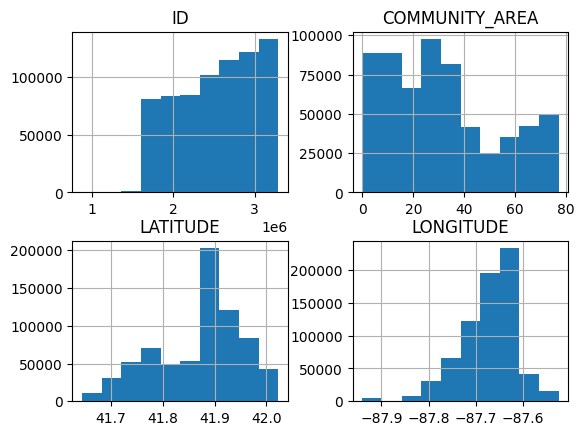

In [15]:
chicago_permits_df_sub.hist()

## Plotting a time series

<AxesSubplot: xlabel='APPLICATION_START_DATE'>

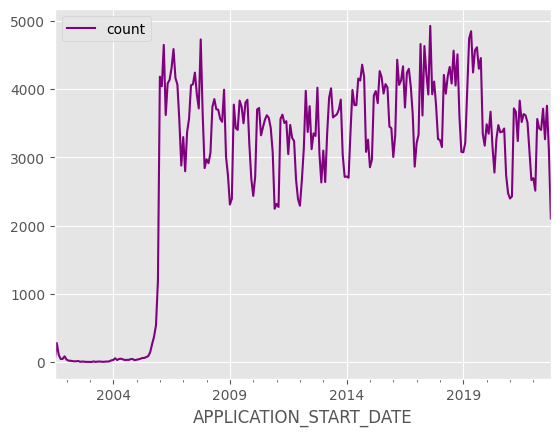

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

Notice how the number of applications in 2005 and before looks suspiciously low. My intuition is that this is a data problem. Let's remove all data from before 2006, since bad data will impact the accuracy of our model. Let's also remove data from before October of this year, since October is incomplete.

<AxesSubplot: xlabel='APPLICATION_START_DATE'>

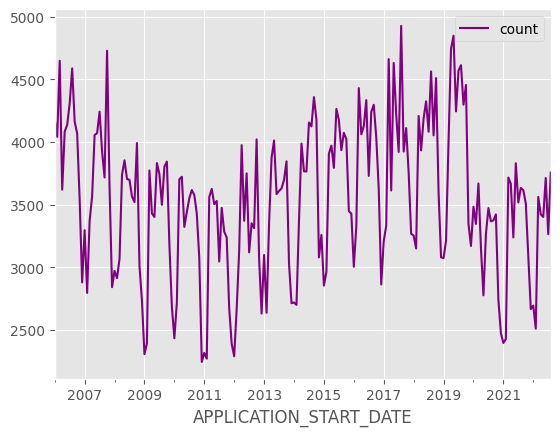

In [17]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2022, 9, 27)

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

This plot makes two things pretty clear. First, there are some clear trends in the time series -- for example, an increase between 2011 and 2017, followed by a levelling off of permit applications. Second, there is a cyclic nature to the time series, which is indicative of there being seasonal variation in permit applications (which isn't surprising).

# Milestone 2
## Part 1

## Understanding long-term trends and seasonality
The types of modeling used on time series assume "stationarity". For a time series to be stationary, mean and variance should be constant over time (and of course, most real life time series will not be stationary). To satisfy this assumption, we need to remove trend and seasonality from our series. The underlying modeling code we will use will do this for us. Doing this ourselves explicitly enables us to make educated guesses about reasonable parameters for our model. We'll use the `seasonal_decompose` function to do this.

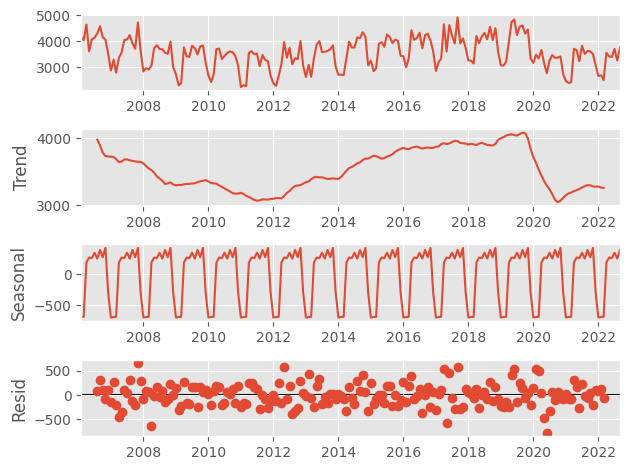

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_df)
fig = result.plot()

## Forecasting with Prophet
Next, we'll create a Prophet model. Doing so requires only that we rename our count column, and that we have a new column "ds" which is our timestamps. After training our model, we'll use it to predict a year into the future.

In [19]:
from prophet import Prophet
model = Prophet()
train_df = data_df.rename(columns={"count":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

C:\Users\kilob\anaconda3\envs\TE360\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:53:40 - cmdstanpy - INFO - Chain [1] start processing
20:53:40 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
train_df

,y,ds
APPLICATION_START_DATE,,
2006-01-31,4181,2006-01-31
2006-02-28,4040,2006-02-28
2006-03-31,4647,2006-03-31
2006-04-30,3619,2006-04-30
2006-05-31,4082,2006-05-31
...,...,...
2022-04-30,3423,2022-04-30
2022-05-31,3401,2022-05-31
2022-06-30,3712,2022-06-30


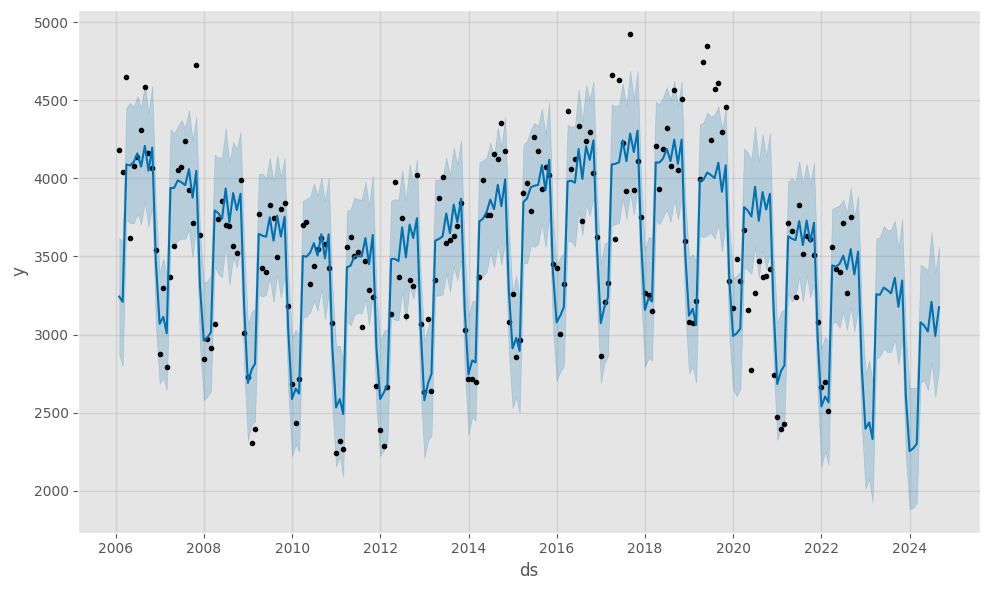

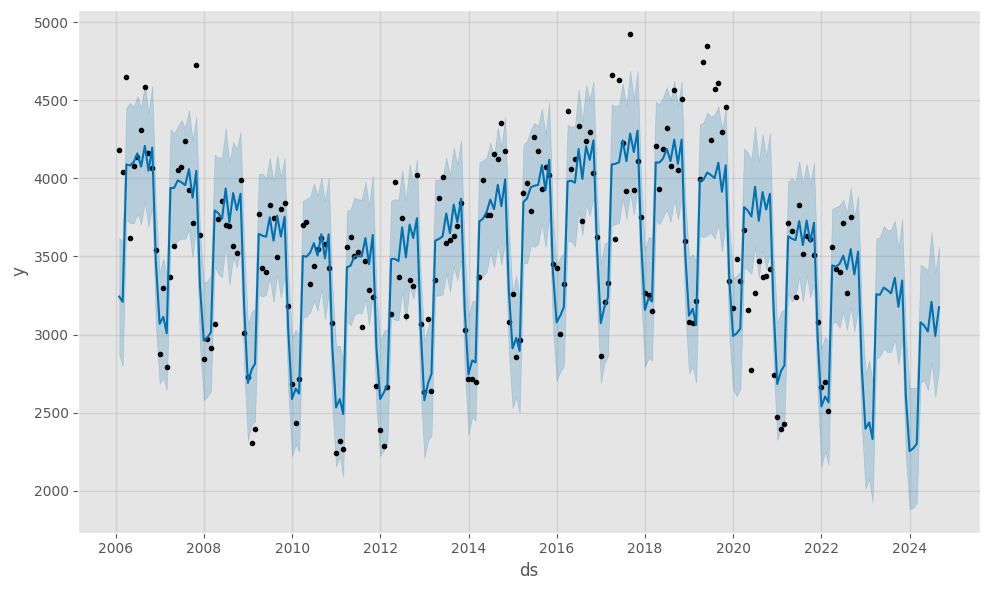

In [21]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(24, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)

In [22]:
train_df.size

400

### Q 1.1

What are your observations about long-term trends and seasonality?

The general trend behaves similar to a sinusoidal wave. It makes sense intuitively since it directly reflects the economics and the demand of commercial space. It slowly dropped when COVID started, and the prediction shows that it will rebound in the near future.

The number of building permits always drops significantly in winter and rebound throughout the year. It makes sense for construction work to slow down during holiday hours in addition to severe cold.

### Q 1.2

Try forecasting with Prophet using different time periods (different number of months). What do you find interesting about the predictions?

In [34]:
new_train_df = train_df.head(165)
new_train_df

,y,ds
APPLICATION_START_DATE,,
2006-01-31,4181,2006-01-31
2006-02-28,4040,2006-02-28
2006-03-31,4647,2006-03-31
2006-04-30,3619,2006-04-30
2006-05-31,4082,2006-05-31
...,...,...
2019-05-31,4847,2019-05-31
2019-06-30,4243,2019-06-30
2019-07-31,4569,2019-07-31


21:05:01 - cmdstanpy - INFO - Chain [1] start processing
21:05:01 - cmdstanpy - INFO - Chain [1] done processing


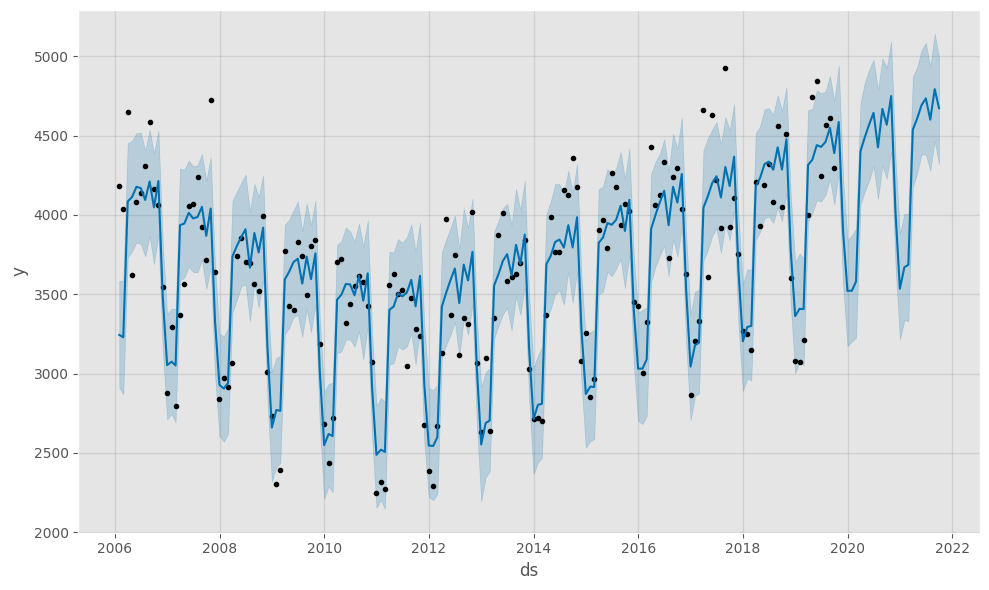

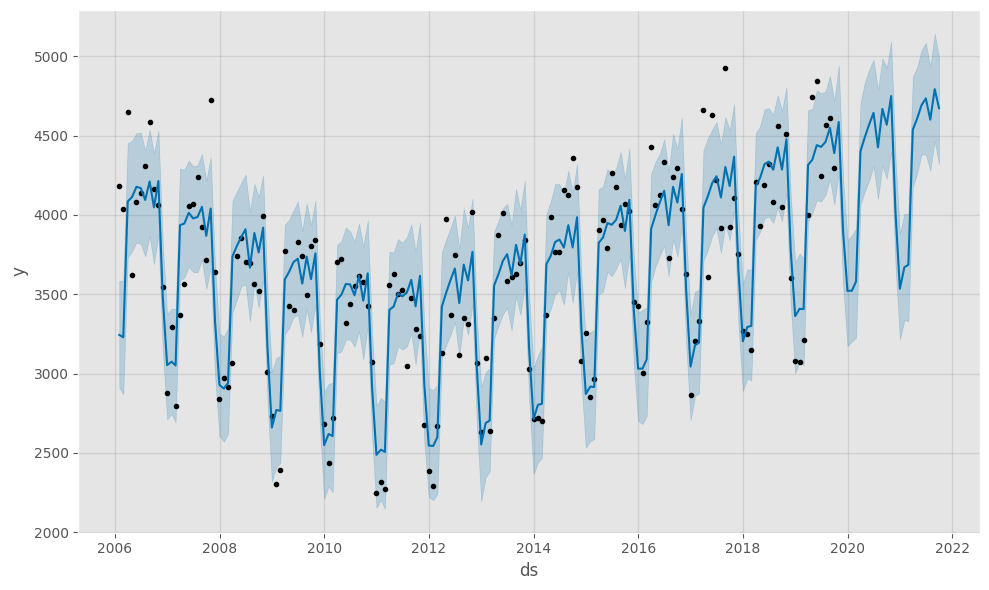

In [35]:
new_model = Prophet()
new_model.fit(new_train_df)

pd.plotting.register_matplotlib_converters()
future = new_model.make_future_dataframe(24, freq='M', include_history=True)
forecast = new_model.predict(future)
new_model.plot(forecast)

If I don't feed the model the data from 2020, the model does not know about the decrease in number of building permits, so it will predict the overall trend to be increasing. However, it still does have the seasonal pattern.

## Part 2

Export the Chicago data portal "Sidewalk_Cafe_Permits.csv" from https://data.cityofchicago.org/Community-Economic-Development/Sidewalk-Cafe-Permits/nxj5-ix6z
Please also read the description about this dateset. 

## Q2
We have learned data loading, cleaning, aggregation in milestone 1.
Follow a similar procedure and fill in the **TODO**s in the code boxes.
Your result should be the same as (or similar to) the results shown below the code boxes. 

In [59]:
# TODO 1: 
# 1. Read the data from csv and save the dataframe named "towed_vehicles_df"
# 2. Print length of the towed_vehicles_df, and print the first 10 rows of towed_vehicles_df
sidewalk_cafe_permit_df = pd.read_csv(r'Sidewalk_Cafe_Permits.csv')
print(len(sidewalk_cafe_permit_df))
sidewalk_cafe_permit_df.head(10)

21148


,PERMIT NUMBER,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ISSUED DATE,EXPIRATION DATE,PAYMENT DATE,ADDRESS,ADDRESS NUMBER START,...,STREET,STREET TYPE,CITY,STATE,ZIP CODE,WARD,POLICE DISTRICT,LATITUDE,LONGITUDE,LOCATION
0,1556602,328992,1,THE LIFEWAY KEFIR SHOP LLC,LIFEWAY KEFIR SHOP,07/16/2021,02/28/2022,07/16/2021,0 W DIVISION ST,0,...,DIVISION,ST,CHICAGO,IL,60622.0,1,18.0,41.904051,-87.628747,"(41.90405051948726, -87.62874675447662)"
1,1531303,399498,1,"JERRY'S SANDWICHES LS, LLC",JERRY'S SANDWICHES,07/16/2021,02/28/2022,07/16/2021,4739 N LINCOLN AVE,4739,...,LINCOLN,AVE,CHICAGO,IL,60625.0,47,19.0,41.967699,-87.687808,"(41.96769881732379, -87.68780818484225)"
2,1553078,463188,1,"ETTA RIVER NORTH, LLC",ETTA,07/16/2021,02/28/2022,07/16/2021,0 N CLARK ST,0,...,CLARK,ST,CHICAGO,IL,60654.0,2,1.0,41.882002,-87.631032,"(41.88200198545344, -87.6310316367502)"
3,1534556,252742,1,"SQUARE KITCHEN, LLC",FORK,07/16/2021,02/28/2022,07/16/2021,4600 N LINCOLN AVE,4600,...,LINCOLN,AVE,CHICAGO,IL,60625.0,47,19.0,41.964902,-87.686279,"(41.964902360748326, -87.68627917084095)"
4,1556006,337178,1,"ROCCO'S, LLC",RANALLI'S,07/16/2021,02/28/2022,07/16/2021,0 N LINCOLN AVE,0,...,LINCOLN,AVE,CHICAGO,IL,60614.0,43,NaN,NaN,NaN,NaN
5,1536621,414414,1,BBSC #4 LLC,BROWN BAG SEAFOOD CO.,07/16/2021,02/28/2022,07/16/2021,3400 N LINCOLN AVE,3400,...,LINCOLN,AVE,CHICAGO,IL,60657.0,47,19.0,41.943303,-87.671355,"(41.94330292584782, -87.67135515305324)"
6,1559950,34063,1,"GASTHAUS ZUM LOEWEN, INC.",THE REVELER,07/16/2021,02/28/2022,07/16/2021,0 W ROSCOE ST,0,...,ROSCOE,ST,CHICAGO,IL,60657.0,32,NaN,NaN,NaN,NaN
7,1540360,23957,1,TEMPO CAFE LIMITED,TEMPO CAFE,07/16/2021,02/28/2022,07/15/2021,6 E CHESTNUT ST,6,...,CHESTNUT,ST,CHICAGO,IL,60611.0,2,18.0,41.898431,-87.628009,"(41.89843137207629, -87.6280091630558)"
8,1543349,425540,1,MI FOGATA INC.,MI FOGATA INC.,07/16/2021,02/28/2022,07/16/2021,4322 N WESTERN AVE,4322,...,WESTERN,AVE,CHICAGO,IL,60618.0,47,19.0,41.960229,-87.688800,"(41.96022917610446, -87.68880023680377)"
9,1555187,340126,1,SHINE RESTAURANT CORP.,"SHINE RESTAURANT, RISE SUSHI RESTAURANT",07/17/2021,02/28/2022,07/14/2021,0 W WEBSTER AVE,0,...,WEBSTER,AVE,CHICAGO,IL,60614.0,43,NaN,NaN,NaN,NaN


In [102]:
# TODO 2: 
# Print the 10 dates ("ISSUED DATE") with the most number of business licenses issued, with their number of licenses issued
sidewalk_cafe_sub = sidewalk_cafe_permit_df[sidewalk_cafe_permit_df["ISSUED DATE"].notnull()]
sidewalk_cafe_sub_notnull = sidewalk_cafe_sub[["ISSUED DATE"]].reset_index(drop=True)

sidewalk_cafe_sub_notnull["ISSUED DATE"] = sidewalk_cafe_sub_notnull["ISSUED DATE"].apply(pd.to_datetime)
sidewalk_cafe_sub_notnull = sidewalk_cafe_sub_notnull.set_index(sidewalk_cafe_sub_notnull["ISSUED DATE"])
grouped_cafe = sidewalk_cafe_sub_notnull.resample("M").count()
grouped_cafe
data_df = pd.DataFrame({"count": grouped_cafe.values.flatten()}, index=grouped_cafe.index)
data_df.sort_values("count", ascending=False).head(10)

,count
ISSUED DATE,
2022-03-31,492
2017-04-30,428
2015-04-30,413
2021-06-30,408
2019-04-30,395
2018-03-31,395
2018-04-30,394
2013-04-30,390
2016-03-31,384


In [56]:
# TODO 3: 
# 1.Extract only the dates ("Tow Date") from towed_vehicles_df
# 2.Drop the rows with notnull values and reset the index
# 3.Print first 10 rows of the result towed_vehicles_date_df

sidewalk_cafe_sub = sidewalk_cafe_permit_df[sidewalk_cafe_permit_df["ISSUED DATE"].notnull()]
sidewalk_cafe_sub_notnull = sidewalk_cafe_sub[["ISSUED DATE"]].reset_index(drop=True)
sidewalk_cafe_sub_notnull.head(10)

,ISSUED DATE
0,2021-07-16
1,2021-07-16
2,2021-07-16
3,2021-07-16
4,2021-07-16
5,2021-07-16
6,2021-07-16
7,2021-07-16
8,2021-07-16
9,2021-07-17


## Part 3


### Time series

In [119]:
fixed_cafe_dates_df = sidewalk_cafe_sub_notnull.copy()
fixed_cafe_dates_df["ISSUED DATE"] = fixed_cafe_dates_df["ISSUED DATE"].apply(pd.to_datetime)
fixed_cafe_dates_df = fixed_cafe_dates_df.set_index(fixed_cafe_dates_df["ISSUED DATE"])
grouped_cafe_dates = fixed_cafe_dates_df.resample("M").count()
data_cafe_df = pd.DataFrame({"count": grouped_cafe_dates.values.flatten()}, index=grouped_cafe_dates.index)
data_cafe_df.head(10)

,count
ISSUED DATE,
2001-03-31,56
2001-04-30,181
2001-05-31,142
2001-06-30,69
2001-07-31,17
2001-08-31,7
2001-09-30,4
2001-10-31,5
2001-11-30,1


<AxesSubplot: xlabel='ISSUED DATE'>

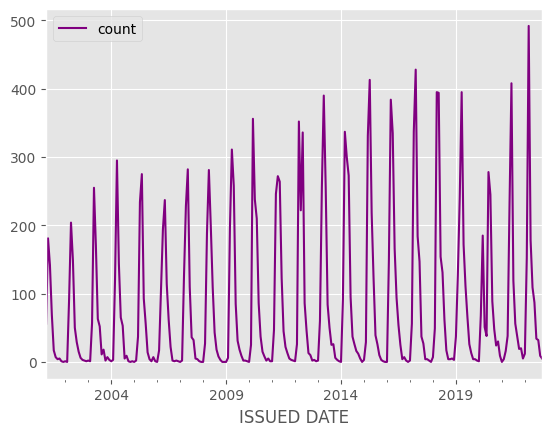

In [120]:
data_cafe_df.plot(color="purple")

<AxesSubplot: xlabel='ISSUED DATE'>

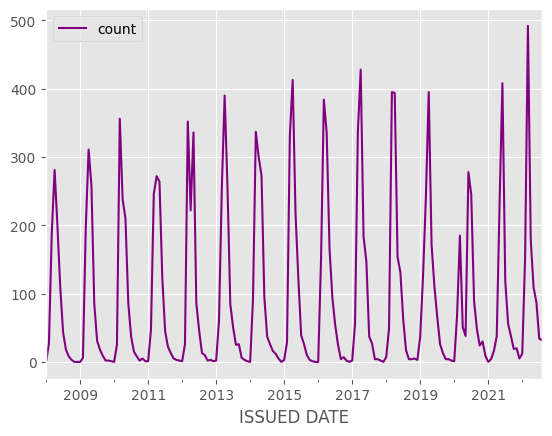

In [105]:
def is_between_2008_and_now(date):
    return date > datetime.datetime(2008, 1, 1) and date < datetime.datetime(2022, 9, 27)

data_cafe_df = data_cafe_df[data_cafe_df.index.to_series().apply(is_between_2008_and_now)]
data_cafe_df.plot(color="purple")

<AxesSubplot: xlabel='ISSUED DATE'>

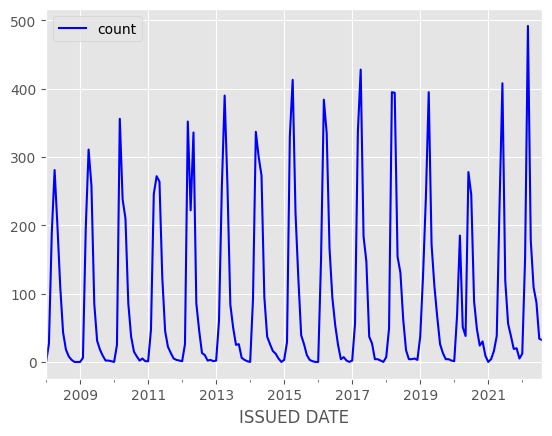

In [121]:
dataperm_df = data_df[data_df.index.to_series().apply(is_between_2008_and_now)]
dataperm_df.plot(color="blue")

## Simple linear regression

We will explore the relationship between building permits and sidewalk cafe permits, using simple linear regression.

In [108]:
perms, cafe = dataperm_df.to_numpy(), data_cafe_df.to_numpy()
perms

array([[  0],
       [ 27],
       [188],
       [281],
       [199],
       [109],
       [ 43],
       [ 18],
       [  8],
       [  3],
       [  0],
       [  0],
       [  0],
       [  6],
       [197],
       [311],
       [258],
       [ 85],
       [ 31],
       [ 18],
       [  9],
       [  2],
       [  2],
       [  1],
       [  0],
       [ 25],
       [356],
       [238],
       [210],
       [ 86],
       [ 37],
       [ 15],
       [  8],
       [  2],
       [  5],
       [  1],
       [  1],
       [ 47],
       [246],
       [272],
       [264],
       [123],
       [ 45],
       [ 22],
       [ 13],
       [  5],
       [  3],
       [  2],
       [  1],
       [ 26],
       [352],
       [222],
       [336],
       [ 86],
       [ 46],
       [ 13],
       [ 10],
       [  2],
       [  3],
       [  1],
       [  2],
       [ 60],
       [255],
       [390],
       [256],
       [ 84],
       [ 50],
       [ 25],
       [ 26],
       [  6],
       [  3],
      

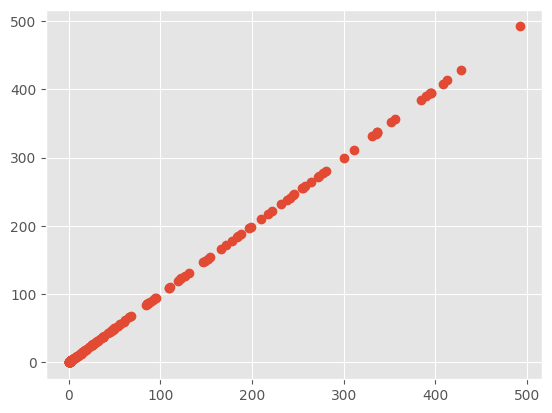

In [112]:
_ = plt.plot(perms,cafe,'o')

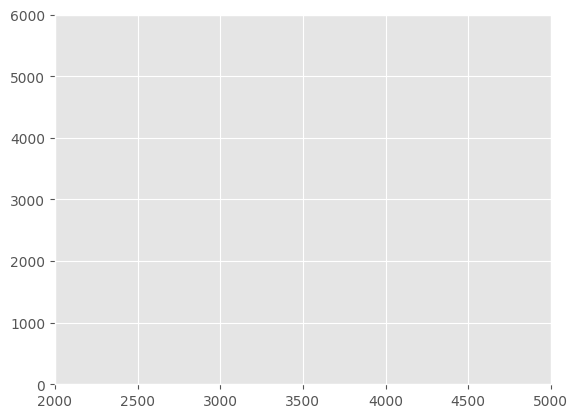

In [113]:
_ = plt.plot(perms,cafe,'o')
_ = plt.ylim([0,6000])
_ = plt.xlim([2000,5000])
plt.show()

In [114]:
import numpy as np
AA = np.vstack([perms.T, np.ones(len(perms))]).T
AA.shape

(176, 2)

In [115]:
m,c = np.linalg.lstsq(AA,cafe,rcond=None)[0]

C:\Users\kilob\AppData\Local\Temp\ipykernel_5496\1311354175.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  _ = plt.grid(b=True, which='major', color='#666666', linestyle='-')


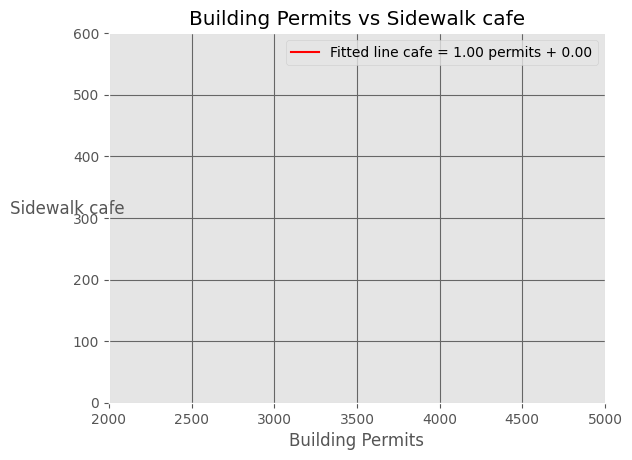

In [116]:
_ = plt.plot(perms,cafe,'o')
_ = plt.plot(perms,m*perms+c, 'r', label='Fitted line cafe = %.2f permits + %.2f' %(m,c))
_ = plt.legend()
_ = plt.xlabel('Building Permits')
_ = plt.ylabel('Sidewalk cafe', rotation='horizontal')
_ = plt.title('Building Permits vs Sidewalk cafe')
_ = plt.xlim([2000,5000])
_ = plt.ylim([0,600])
_ = plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [92]:
# remove outlier and redo the regression:
cafe[cafe.argmax()]=cafe.mean()

C:\Users\kilob\AppData\Local\Temp\ipykernel_5496\2051149550.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  _ = plt.grid(b=True, which='major', color='#666666', linestyle='-')


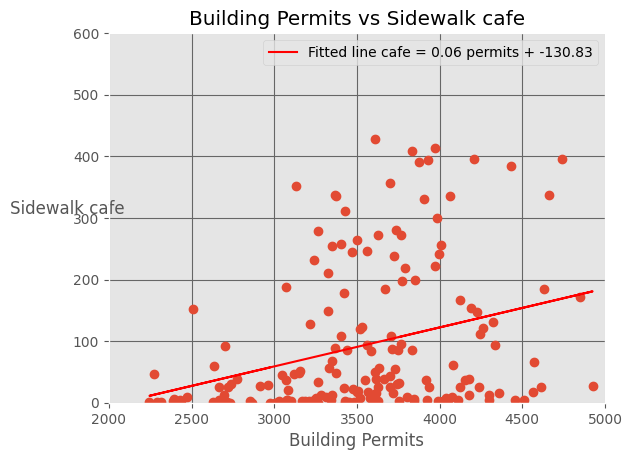

In [101]:
AA = np.vstack([perms.T, np.ones(len(perms))]).T
m,c = np.linalg.lstsq(AA,cafe,rcond=None)[0]
_ = plt.plot(perms,cafe,'o')
_ = plt.plot(perms,m*perms+c, 'r', label='Fitted line cafe = %.2f permits + %.2f' %(m,c))
_ = plt.legend()
_ = plt.xlabel('Building Permits')
_ = plt.ylabel('Sidewalk cafe', rotation='horizontal')
_ = plt.title('Building Permits vs Sidewalk cafe')
_ = plt.xlim([2000,5000])
_ = plt.ylim([0,600])
_ = plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [ ]:
#TODO: Learn Polynomial regression with the tutoriols. https://www.w3schools.com/python/python_ml_polynomial_regression.asp
#https://medium.com/analytics-vidhya/polynomial-fitting-in-python-using-just-one-line-of-code-f1638a4b3678
#Polynomial regression on the Building Permits and Sidewalk cafe dataset.


### Q3

Turn in an example where you compare two data sets using a regression analysis. It can be a simple linear regression as the instructor did in the class or more sophisticated if you would like. You can use Python or Matlab or even Excel if you want. 

In [129]:
import torch

In [133]:
def linear_normal(X, Y):
    '''
    Arguments:
        X (n x d FloatTensor): the feature matrix
        Y (n x 1 FloatTensor): the labels

    Returns:
        (d + 1) x 1 FloatTensor: the parameters w
    '''
    n = X.size(dim=0)
    d = X.size(dim=1)
    oneCol = torch.ones(n).reshape(n, -1)
    X = torch.cat((oneCol, X), 1)
    w = (torch.pinverse(X) @ Y).reshape(-1, 1)
    return w

In [122]:
def load_reg_data():
    # load the regression synthetic data
    torch.manual_seed(0) # force seed so same data is generated every time

    X = torch.linspace(0, 4, 100).reshape(-1, 1)
    noise = torch.normal(0, .4, size=X.shape)
    w = 0.5
    b = 1.
    Y = w * X**2 + b + noise

    return X, Y

In [137]:
def plot_linear():
    '''
    Returns:
        Figure: the figure plotted with matplotlib
    '''
    X, Y = load_reg_data()
    plt.scatter(X[:, 0], Y[:, 0])
    w = linear_normal(X,Y)
    n = X.size(dim=0)
    oneCol = torch.ones(n).reshape(n, -1)
    X_offset = torch.cat((oneCol, X), 1)
    ols = X_offset @ w
    plt.plot(X, ols, color='blue')
    plt.title("Prediction of X with $w$ using Linear_normal")
    plt.show()
    return plt.gcf()

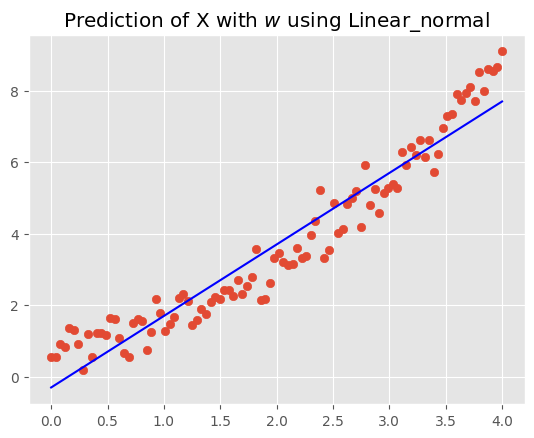

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [138]:
plot_linear()